<a href="https://colab.research.google.com/github/seokjinwoo/AIandEcon/blob/main/lec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### numpy 의 array 계속

In [ ]:
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6])
print(x)

print(x.ndim)

x_reshape = x.reshape( (2,3) )

print(x_reshape)

print(x_reshape.ndim)


[1 2 3 4 5 6]
1
[[1 2 3]
 [4 5 6]]
2


In [ ]:
# indexing 혹은 slicing
# list 나 array에 숫자를 집어 넣었는데
# 이걸 꺼내와야 될 필요가 있음


print(x[0])
print(x_reshape[0,0])

# x_reshape 에서 4를 추출해보시오.

print(x_reshape[1,0])

# x_reshape 에서 5를 10으로 바꾼다
x_reshape[1,1] = 10
print(x_reshape[1,1])
print(x_reshape)



1
1
4
10
[[ 1  2  3]
 [ 4 10  6]]


In [ ]:
# 난수를 추출한다.

x = np.random.normal(loc=8, scale=1, size =50)
y = np.random.normal(loc=8, scale=1, size =50)

# print(x)
# print(y)

# np.corrcoef(x,y)

print(np.mean(x))
print(np.var(x))
print(np.std(x))

7.995040650181993
0.7933983645174283
0.8907291196078796


- 데이터를 불러들여서 사용한다.

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
files.upload()



In [ ]:
import pandas as pd

df = pd.read_csv('/content/auto.csv')
df

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,23,4.0,2.5,12,2160,172,36,97,3.74,Foreign
70,VW Diesel,5397,41,5.0,3.0,15,2040,155,35,90,3.78,Foreign
71,VW Rabbit,4697,25,4.0,3.0,15,1930,155,35,89,3.78,Foreign
72,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign


In [ ]:
print(df['price'].sum())
print(df['price'].mean())
df.shape


456229
6165.256756756757


(74, 12)

In [ ]:
# print(df['rep78'])

# 결측치가 있는 경우가 다수임.
# 결측치가 있는 관측치는 버리거나(easy).
# 아니면 결측치를 채워서 쓰거나(sophisticated, multiple imputation)

df_new = df.dropna()
df_new.shape

(69, 12)

In [ ]:
df.columns

Index(['make', 'price', 'mpg', 'rep78', 'headroom', 'trunk', 'weight',
       'length', 'turn', 'displacement', 'gear_ratio', 'foreign'],
      dtype='object')

In [ ]:
df[['price','mpg']]

,price,mpg
0,4099,22
1,4749,17
2,3799,22
3,4816,20
4,7827,15
...,...,...
69,7140,23
70,5397,41
71,4697,25
72,6850,25


In [ ]:
df[['price','mpg']].corr()

,price,mpg
price,1.000000,-0.468597
mpg,-0.468597,1.000000


### matplotlib 을 이용해서 시각화 한다.

In [ ]:
# !pip install koreanize-matplotlib

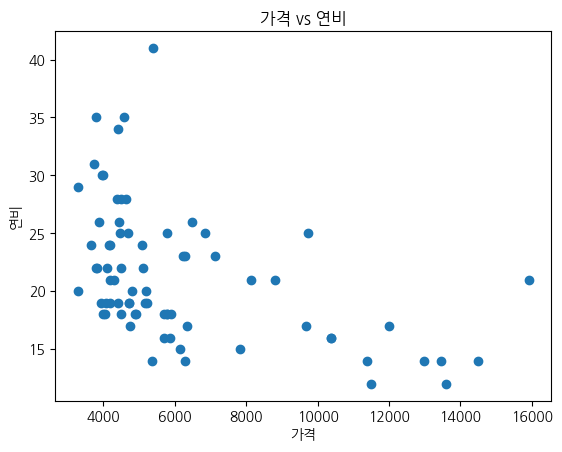

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# matlab 이라고 하는 수학 프로그램의 그래프처럼 그려주는 라이브러리
# seaborn, plotly 같은 라이브러리도 많이 쓴다.

plt.scatter(df['price'], df['mpg'])
plt.title('가격 vs 연비')
plt.xlabel('가격')
plt.ylabel('연비')
plt.show()






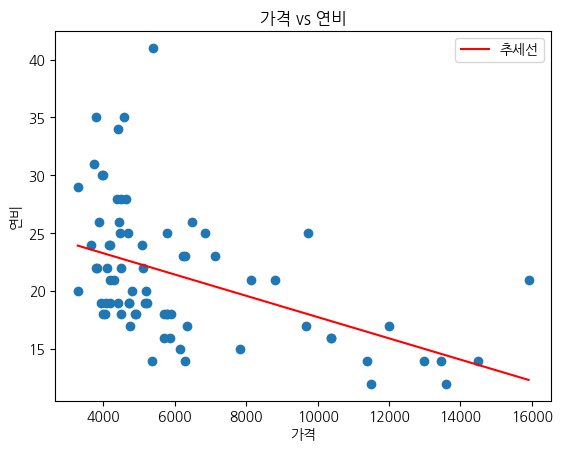

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 산점도 그리기
plt.scatter(df['price'], df['mpg'])

# 선형 회귀 (추세선) 계산
# df['price']와 df['mpg']의 선형 회귀계수(기울기와 절편)를 구합니다.
m, b = np.polyfit(df['price'], df['mpg'], 1)

# 회귀 직선을 위한 x값 생성: 데이터 범위 내에서 100개의 균일한 점
x = np.linspace(df['price'].min(), df['price'].max(), 100)
y = m * x + b

# 추세선 그리기
plt.plot(x, y, color='red', label='추세선')

# 그래프에 제목 및 레이블 추가
plt.title('가격 vs 연비')
plt.xlabel('가격')
plt.ylabel('연비')
plt.legend()

plt.show()


### 기초 통계학

In [ ]:
x = [
    2.4, 3.9, 7.1, 7.3, 7.9, 8.9, 9, 9.5,
    9.6, 9.8, 10, 10.3, 10.5, 12.4, 12.5, 13, 13.2, 13.6
]
print(x)

[2.4, 3.9, 7.1, 7.3, 7.9, 8.9, 9, 9.5, 9.6, 9.8, 10, 10.3, 10.5, 12.4, 12.5, 13, 13.2, 13.6]


- 히스토그래

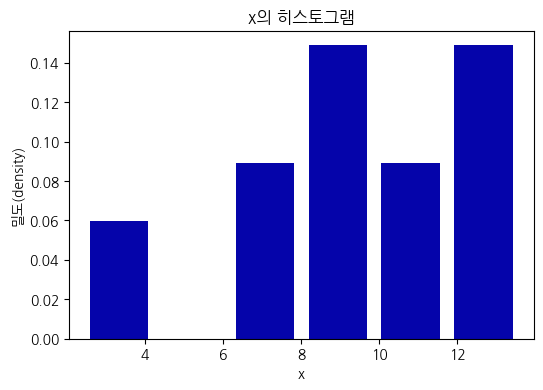

In [ ]:
# prompt: x 의 히스토그램을 그려주세요

plt.figure(figsize=(6, 4))
plt.hist(x, bins = 'auto', density=True, color="#0504aa", rwidth=0.8)  # bins는 히스토그램의 막대 개수를 조절합니다.
plt.xlabel('x')
plt.ylabel('밀도(density)')
plt.title('x의 히스토그램')
plt.show()


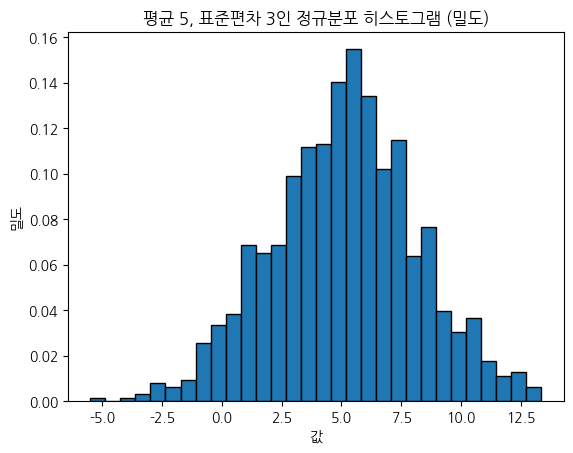

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 난수 추출: 평균 5, 표준편차 3, 1000개
data = np.random.normal(loc=5, scale=3, size=1000)

# 밀도로 설정한 히스토그램 그리기
plt.hist(data, bins=30, density=True, edgecolor='black')
plt.title('평균 5, 표준편차 3인 정규분포 히스토그램 (밀도)')
plt.xlabel('값')
plt.ylabel('밀도')
plt.show()


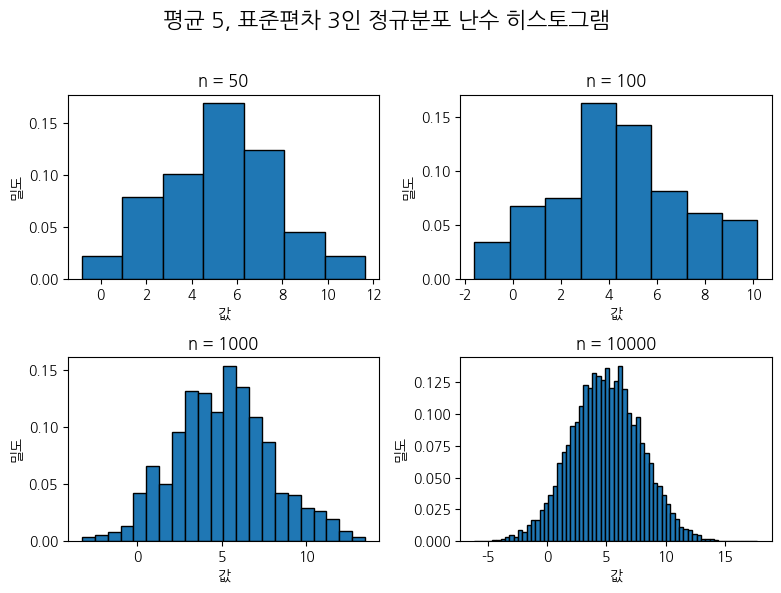

In [ ]:
# n= 50, 100, 1000, 10000 개 일 때 히스토그램을 각각 그리는데
# 2 by 2 그래프에 담아줘.

import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 각 샘플 크기에 대해 난수 생성
data50   = np.random.normal(loc=5, scale=3, size=50)
data100  = np.random.normal(loc=5, scale=3, size=100)
data1000 = np.random.normal(loc=5, scale=3, size=1000)
data10000= np.random.normal(loc=5, scale=3, size=10000)

# 2x2 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# n = 50인 경우
axs[0, 0].hist(data50, bins='auto', density=True, edgecolor='black')
axs[0, 0].set_title('n = 50')
axs[0, 0].set_xlabel('값')
axs[0, 0].set_ylabel('밀도')

# n = 100인 경우
axs[0, 1].hist(data100, bins='auto', density=True, edgecolor='black')
axs[0, 1].set_title('n = 100')
axs[0, 1].set_xlabel('값')
axs[0, 1].set_ylabel('밀도')

# n = 1000인 경우
axs[1, 0].hist(data1000, bins='auto', density=True, edgecolor='black')
axs[1, 0].set_title('n = 1000')
axs[1, 0].set_xlabel('값')
axs[1, 0].set_ylabel('밀도')

# n = 10000인 경우
axs[1, 1].hist(data10000, bins='auto', density=True, edgecolor='black')
axs[1, 1].set_title('n = 10000')
axs[1, 1].set_xlabel('값')
axs[1, 1].set_ylabel('밀도')

fig.suptitle('평균 5, 표준편차 3인 정규분포 난수 히스토그램', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



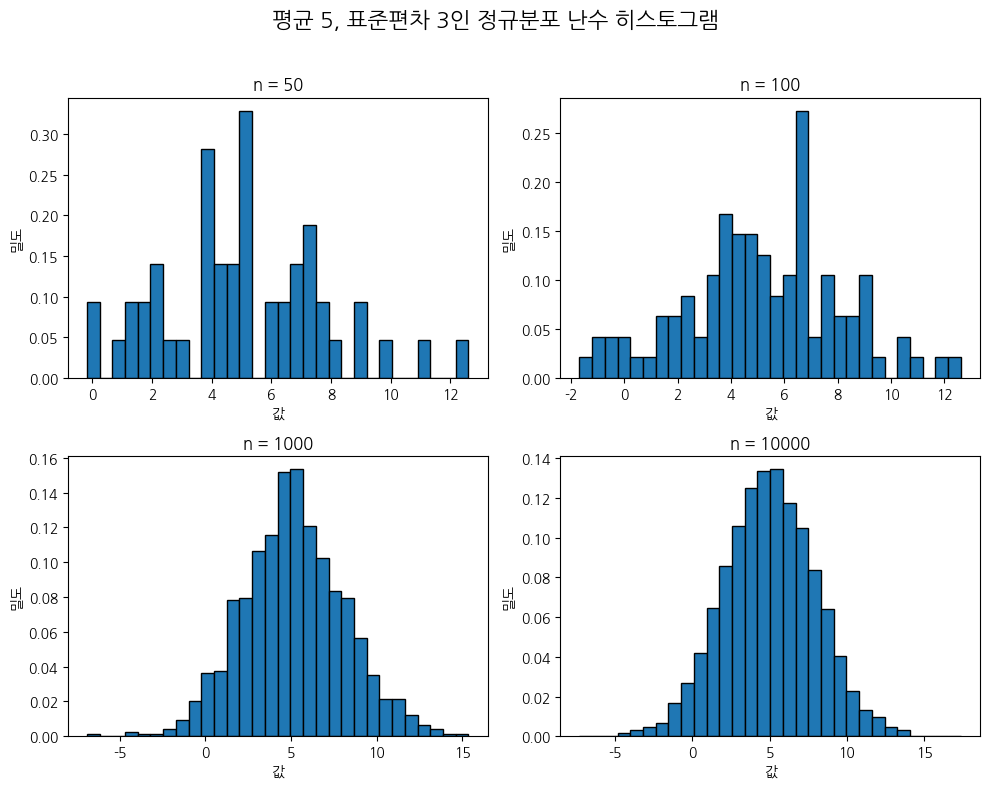

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 각 샘플 크기를 리스트에 저장
n_list = [50, 100, 1000, 10000]

# 2x2 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# for loop를 이용하여 각 샘플 크기에 대한 히스토그램 그리기
for i, n in enumerate(n_list):
    row = i // 2
    col = i % 2
    data = np.random.normal(loc=5, scale=3, size=n)
    axs[row, col].hist(data, bins=30, density=True, edgecolor='black')
    axs[row, col].set_title(f'n = {n}')
    axs[row, col].set_xlabel('값')
    axs[row, col].set_ylabel('밀도')

fig.suptitle('평균 5, 표준편차 3인 정규분포 난수 히스토그램', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


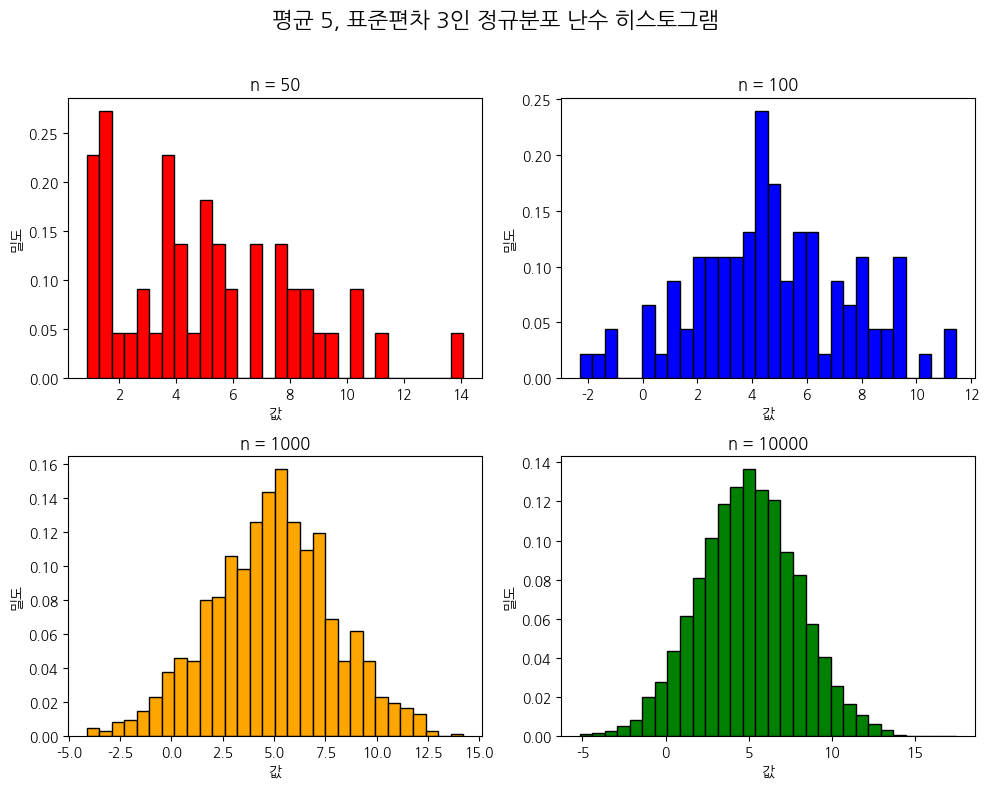

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 샘플 크기와 슬램덩크 느낌의 색상 리스트
n_list = [50, 100, 1000, 10000]
colors = ['red', 'blue', 'orange', 'green']  # 슬램덩크 느낌의 강렬한 색상

# 2x2 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# for loop를 이용하여 각 샘플 크기에 대한 히스토그램 그리기
for i, n in enumerate(n_list):
    row = i // 2
    col = i % 2
    data = np.random.normal(loc=5, scale=3, size=n)
    axs[row, col].hist(data, bins=30, density=True, edgecolor='black', color=colors[i])
    axs[row, col].set_title(f'n = {n}')
    axs[row, col].set_xlabel('값')
    axs[row, col].set_ylabel('밀도')

fig.suptitle('평균 5, 표준편차 3인 정규분포 난수 히스토그램', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
